In [1]:
#Setup
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

# Lab 2
## Probability, Distributions, and Statistical Questions

#### Problem 1
##### A)

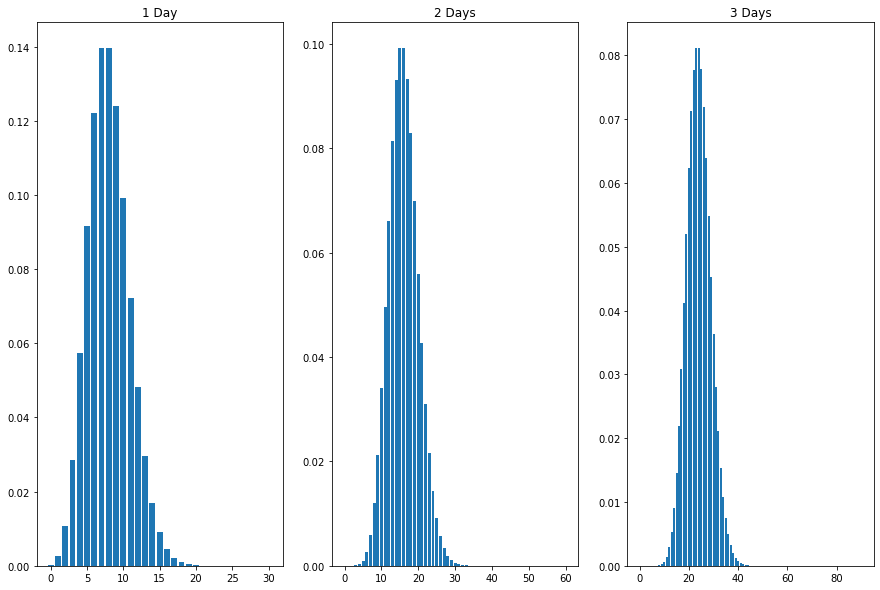

In [2]:
X = 8
Y = 12
vals = range(0,31)
p1 = stats.poisson.pmf(vals,X)
p2 = p1
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.bar(vals,p1)
x2 = range(0,61)
for i in range(0,1):
    p2 = scipy.signal.fftconvolve(p2,stats.poisson.pmf(vals,X))
ax2.bar(x2,p2)
x3 = range(0,91)
p3 = stats.poisson.pmf(vals,X)
for i in range(0,2):
    p3 = scipy.signal.fftconvolve(p3,stats.poisson.pmf(vals,X))
ax3.bar(x3,p3)
ax1.title.set_text('1 Day')
ax2.title.set_text('2 Days')
ax3.title.set_text('3 Days')
plt.show()

B)

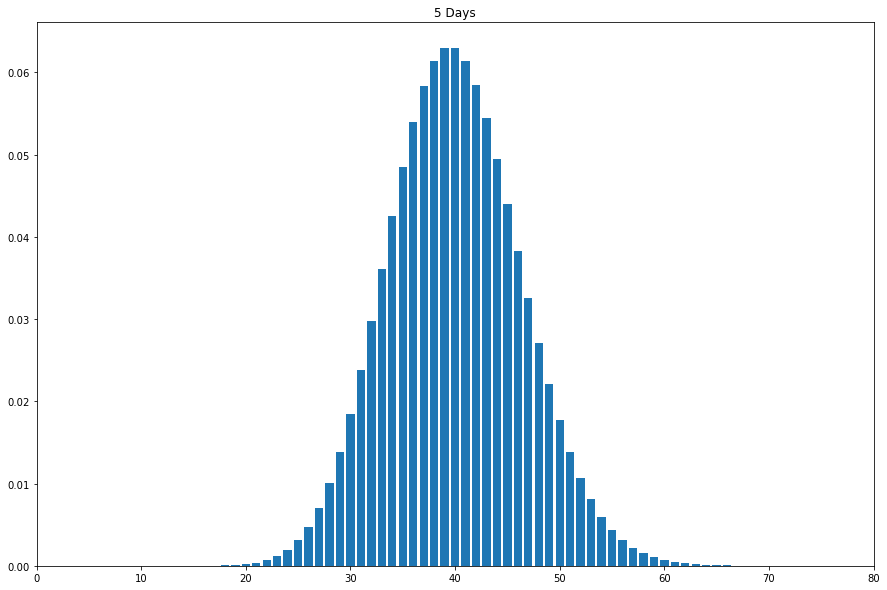

Mean: 40.0 Variance: 40.0


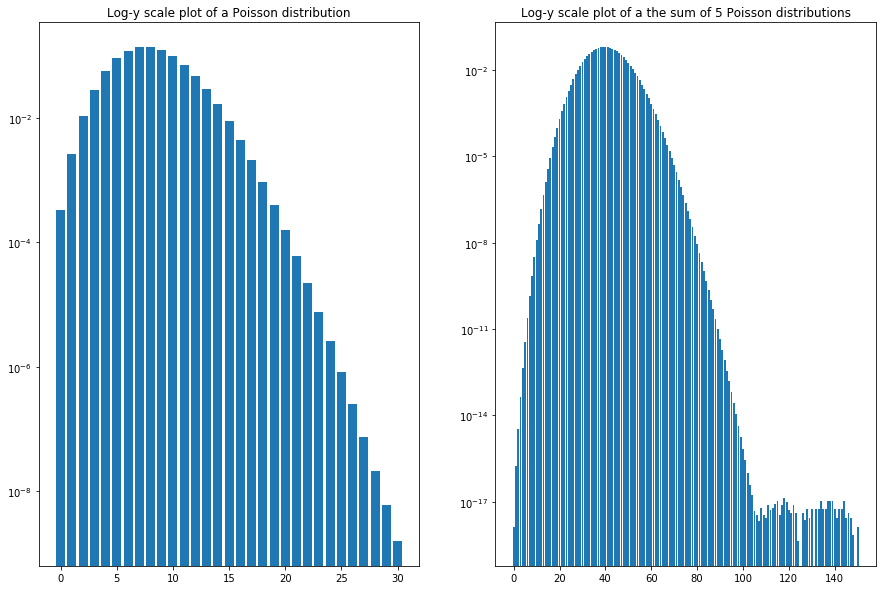

In [3]:
fig, ax = plt.subplots(1,1)
x5 = range(0,151)
p5 = stats.poisson.pmf(vals,X)
for i in range(0,4):
    p5 = scipy.signal.fftconvolve(p5,stats.poisson.pmf(vals,X))
ax.bar(x5,p5)
ax.title.set_text('5 Days')
plt.xlim([0,80])
plt.show()
ex = sum(x5*p5)
ex2 = sum(p5*np.square(x5))
var = ex2-ex**2
print('Mean:', np.round(ex,4), 'Variance:', np.round(var,4))
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(vals,p1)
ax2.bar(x5,p5)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.title.set_text('Log-y scale plot of a Poisson distribution')
ax2.title.set_text('Log-y scale plot of a the sum of 5 Poisson distributions')

The mean and variance of the above distribution are both n*$\mu$ which is consistent with a poisson distribution. Also log plots of the distributions give the same general shape. The noise on the upper values of the sum is consistent with rounding errors at around $10^{-17}$.

##### C)

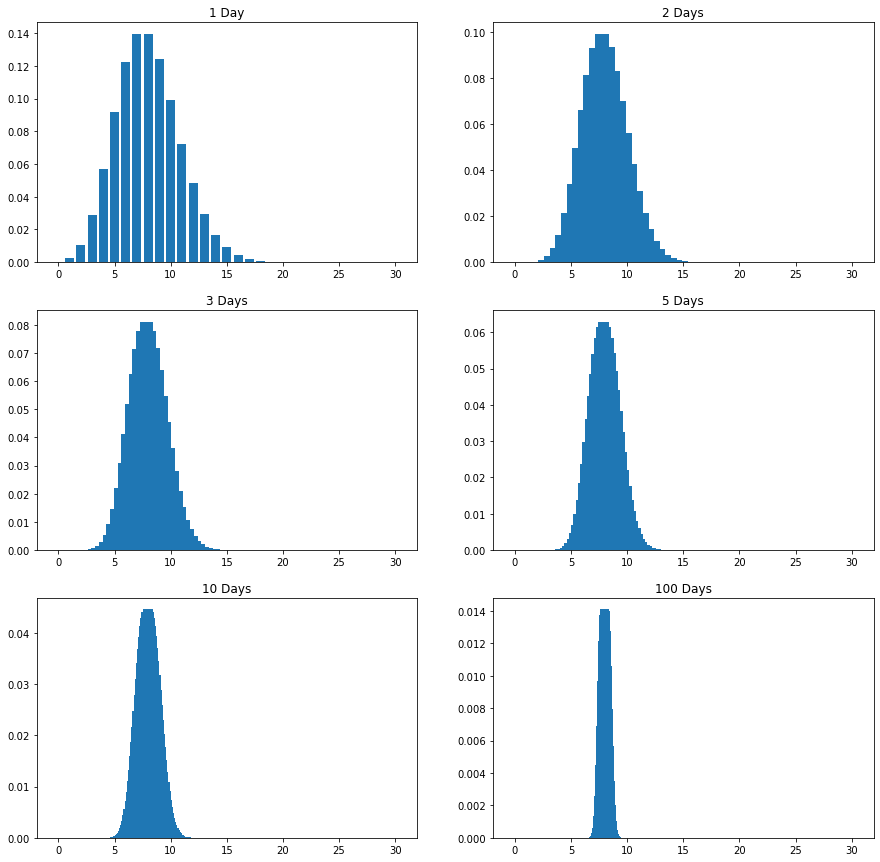

In [4]:
plt.rcParams["figure.figsize"] = (15,15)
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
ax1.bar(vals,p1)
x2 = np.linspace(0,30,61)
ax2.bar(x2,p2)
x3 = np.linspace(0,30,91)
ax3.bar(x3,p3)
x5 = np.linspace(0,30,151)
ax4.bar(x5,p5)
ax1.title.set_text('1 Day')
ax2.title.set_text('2 Days')
ax3.title.set_text('3 Days')
ax4.title.set_text('5 Days')
x10 = np.linspace(0,30,301)
p10 = stats.poisson.pmf(vals,X)
for i in range(0,9):
    p10 = scipy.signal.fftconvolve(p10,stats.poisson.pmf(vals,X))
ax5.bar(x10,p10)
x100 = np.linspace(0,30,3001)
p100 = stats.poisson.pmf(vals,X)
for i in range(0,99):
    p100 = scipy.signal.fftconvolve(p100,stats.poisson.pmf(vals,X))
ax6.bar(x100,p100)
ax5.title.set_text('10 Days')
ax6.title.set_text('100 Days')
plt.show()

As the number of days averaged increases, the width of the resulting distribution narrows. The distribution also becomes more smooth, this is to be expected because the number of data points is increasing and each bars width is getting smaller.

##### D)

In [5]:
#Number of days N
N = 5
expected = N*Y
vals = range(0,51)
p10 = stats.poisson.pmf(vals,X)
for i in range(0,4):
    p10 = scipy.signal.fftconvolve(p10,stats.poisson.pmf(vals,X))
prob = np.sum(p10[expected:])
sigma = 1- stats.norm.ppf(prob)
print('Sigma of', expected, 'or more measurements in 5 days is', sigma)

Sigma of 60 or more measurements in 5 days is 3.8976868676379297


#### Problem 2
##### A)

In [15]:
x = np.linspace(0,60,401)
p1 = stats.chi2.pdf(x,df = 14)

p2 = p1
for i in range(0,4):
    p2 = scipy.signal.fftconvolve(p2,p1)
x2 = np.linspace(0,60,2001)

p3 = p1
for i in range(0,9):
    p3 = scipy.signal.fftconvolve(p3,p1)
x3 = np.linspace(0,60,4001)

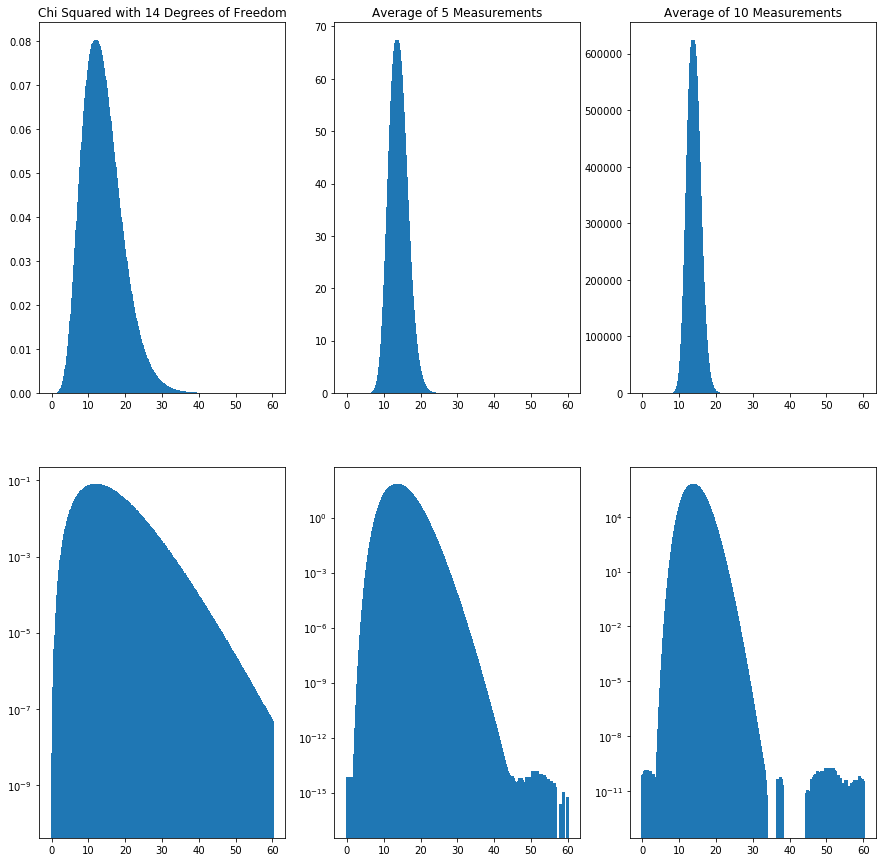

In [16]:
#Plotting
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.bar(x,p1)
ax2.bar(x2,p2)
ax3.bar(x3,p3)
ax4.bar(x,p1)
ax5.bar(x2,p2)
ax6.bar(x3,p3)
ax4.set_yscale('log')
ax5.set_yscale('log')
ax6.set_yscale('log')
ax1.title.set_text('Chi Squared with 14 Degrees of Freedom')
ax2.title.set_text('Average of 5 Measurements')
ax3.title.set_text('Average of 10 Measurements')
plt.show()

##### B)
After 10 averaged measurements the plot starts to look significantly less skewed and a little gausian looking, but the right tail is still long.

In [45]:
x1 = np.linspace(5,25,301)
p4 = p1
for i in range(0,19):
    p4 = scipy.signal.fftconvolve(p4,p1)
x4 = np.linspace(0,60,len(p4))
p5 = p1
for i in range(0,49):
    p5 = scipy.signal.fftconvolve(p5,p1)
x5 = np.linspace(0,60,len(p5))
np5 = p5/sum(p5)
sigma = np.sqrt(sum(np.square(x5)*np5)-sum(x5*np5)**2)
mean = sum(x5*np5)
pg = stats.norm.pdf(x1, loc = mean, scale = sigma)
pg = pg * max(p5)/max(pg)

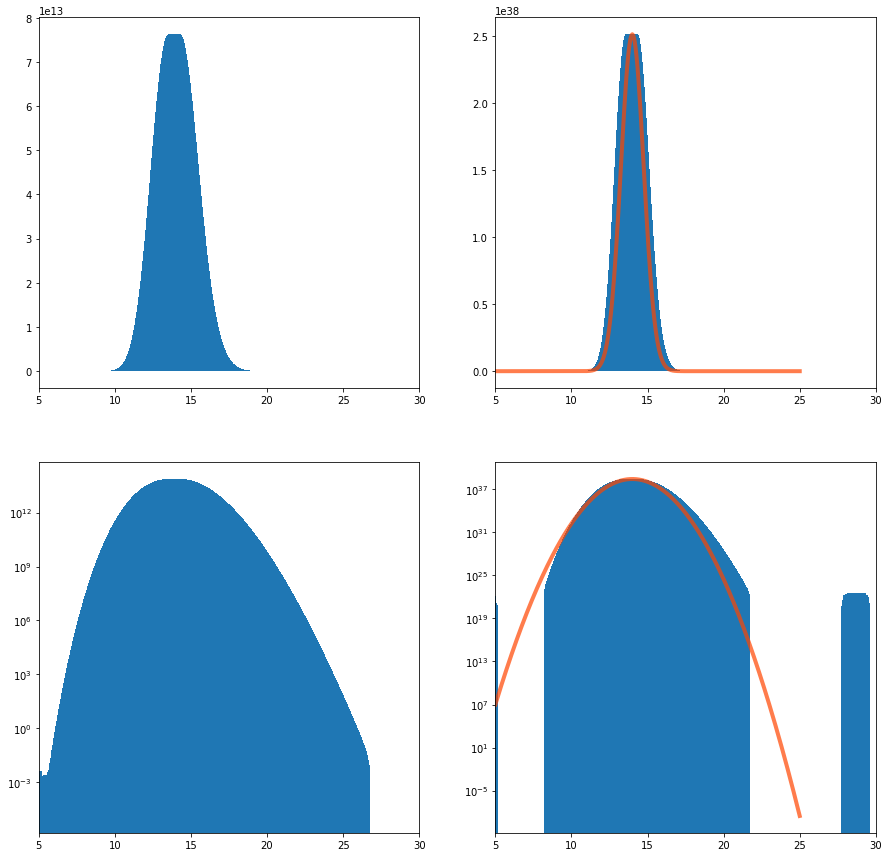

In [46]:
#Plotting
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.bar(x4,p4)
ax2.bar(x5,p5)
ax2.plot(x1,pg, alpha = 0.7, linewidth = 4, color = 'orangered')
ax3.bar(x4,p4)
ax4.bar(x5,p5)
ax4.plot(x1,pg, alpha = 0.7, linewidth = 4,color = 'orangered')
ax3.set_yscale('log')
ax4.set_yscale('log')
ax1.set_xlim([5,30])
ax2.set_xlim([5,30])
ax3.set_xlim([5,30])
ax4.set_xlim([5,30])
plt.show()

After about 20 measurements, the average looks much more gaussian than with less measurements, but still has a longer right tail than left. The overlaid gaussian was made using the expected value, and standard deviation calculated from the 50 measurement distribution. Even with 50 measurements, the distribution is still skew right.
#### Problem 3
##### A)